In [1]:
library(Seurat)
library(WGCNA)
library(igraph)
library(ggplot2)
library(pheatmap)

Attaching SeuratObject

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
as_matrix <- function(mat){
  
  tmp <- matrix(data=0L, nrow = mat@Dim[1], ncol = mat@Dim[2])
  
  row_pos <- mat@i+1
  col_pos <- findInterval(seq(mat@x)-1,mat@p[-1])+1
  val <- mat@x
  
  for (i in seq_along(val)){
    tmp[row_pos[i],col_pos[i]] <- val[i]
  }
  
  row.names(tmp) <- mat@Dimnames[[1]]
  colnames(tmp) <- mat@Dimnames[[2]]
  return(tmp)
}

In [3]:
dataobj<- readRDS('/data1//chenyx//HHCAd//unit_organized/LV.seuratobj.rds')

In [4]:
table(dataobj$cell_type)


               Adipocyte       Cardiomyocyte cell         Endothelial cell 
                     761                    64497                    16756 
              Fibroblast               Lymphocyte                Mast cell 
                   27519                     1192                       19 
               Myelocyte                   Neuron Neutrophilic granulocyte 
                    8389                     1100                      194 
                Pericyte       Smooth muscle cell 
                   10805                     2275 

# CM

In [5]:
ct = "Cardiomyocyte cell"

In [6]:
cm.sample <- subset(dataobj,cell_type==ct,downsample=10000,seed=1234)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [7]:
df <- df[apply(df,1,mad)>0,]

In [8]:
dim(df)

[1]   326 22014

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

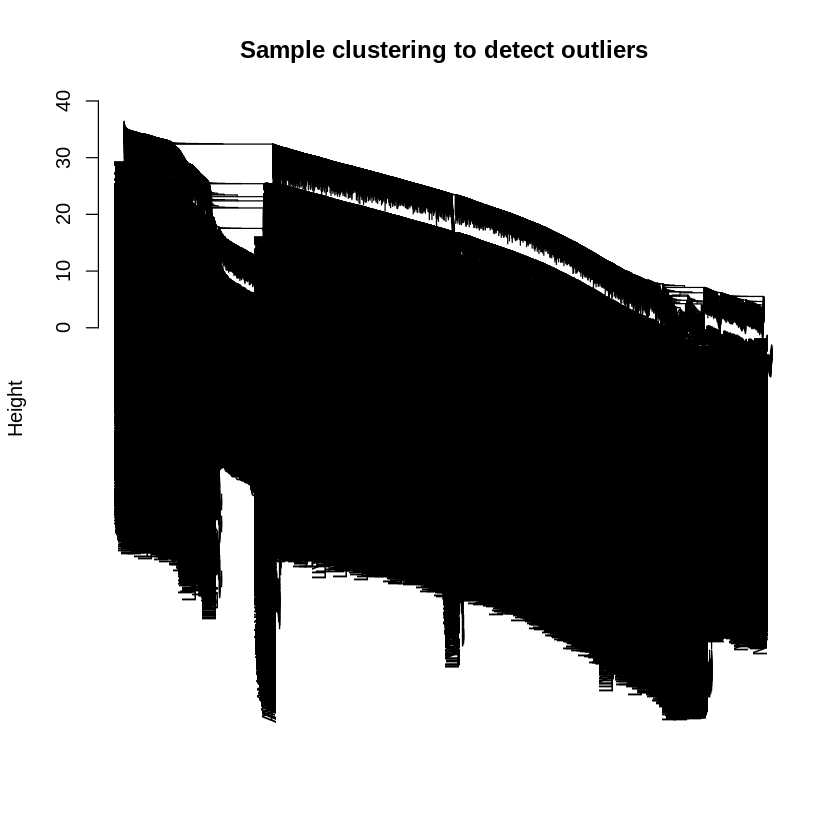

In [9]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [10]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 81 genes from module 1 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
     mergeCloseModules: less than two proper modules.
      ..color levels are grey, turquoise
      ..there is nothing to merge.
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


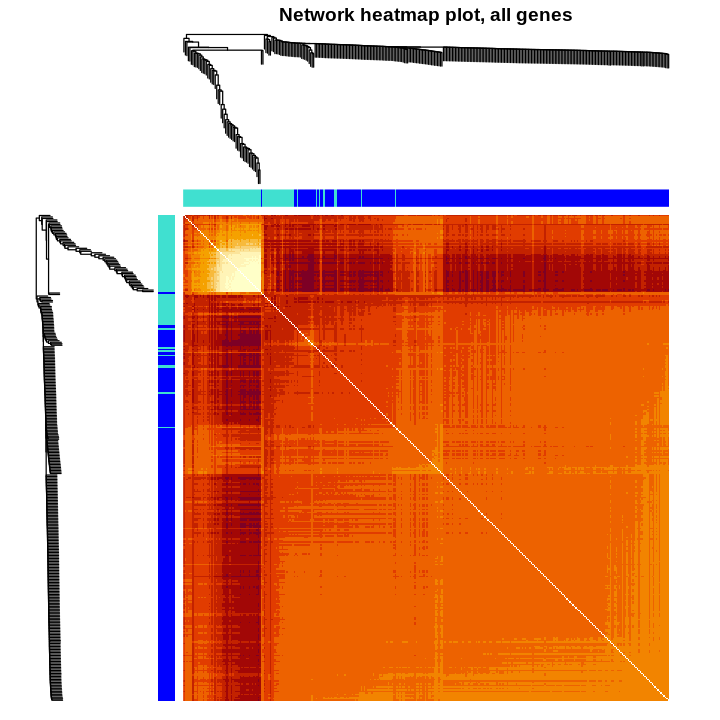

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

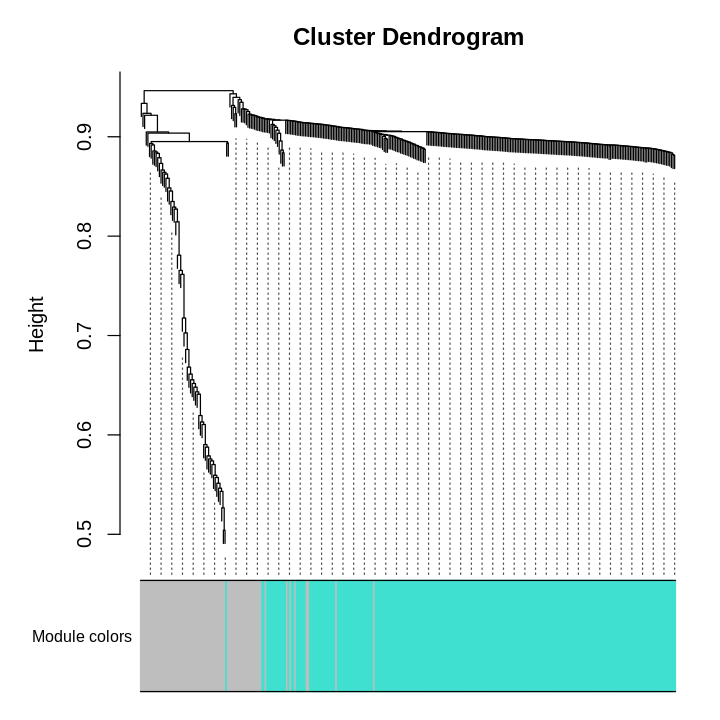

In [12]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [13]:
table(net$colors)


     grey turquoise 
       81       245 

In [14]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [15]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [16]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.csv'))

# Fb

In [17]:
ct = "Fibroblast"

In [18]:
cm.sample <- subset(dataobj,cell_type==ct,downsample=10000,seed=1234)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [19]:
df <- df[apply(df,1,mad)>0,]

In [20]:
dim(df)

[1]   111 20534

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

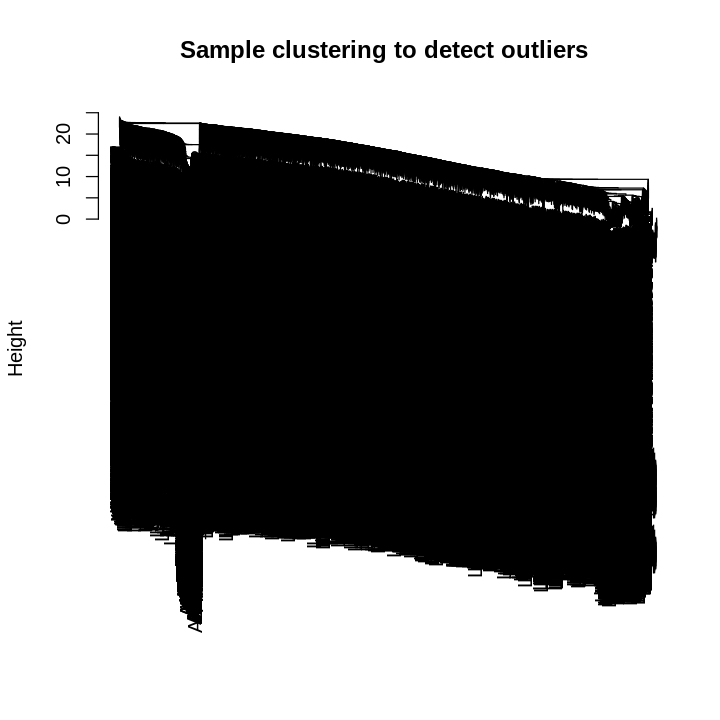

In [21]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [22]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 12 genes from module 1 because their KME is too low.
     ..removing 3 genes from module 2 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


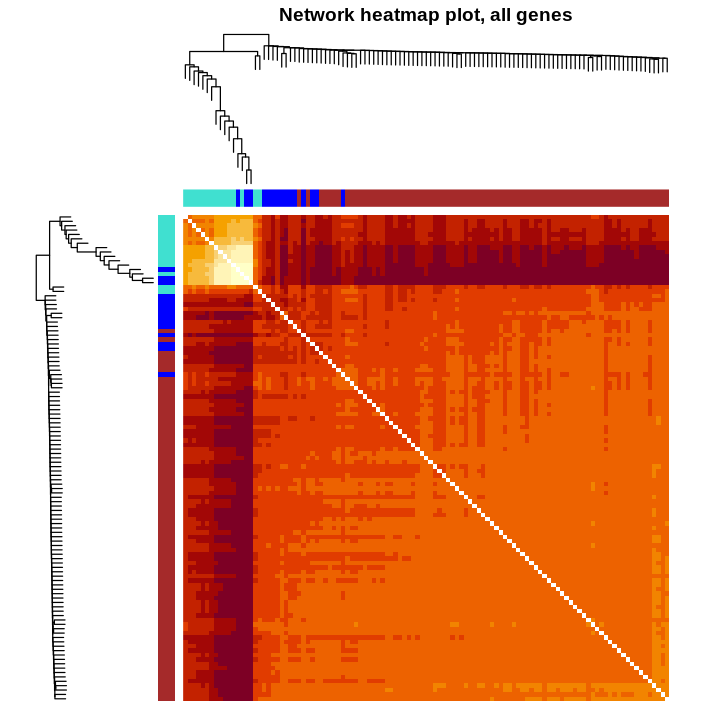

In [23]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

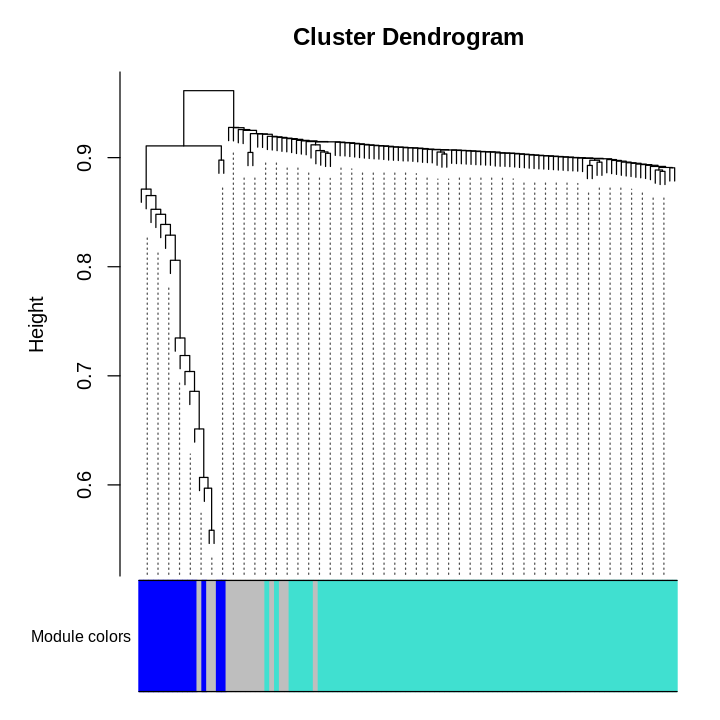

In [24]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [25]:
table(net$colors)


     blue      grey turquoise 
       15        15        81 

In [26]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [27]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [28]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.1.csv'))

In [29]:
googene <- colnames(datExpr_filted)[net$colors == "blue"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [30]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.2.csv'))

# EC

In [31]:
ct = "Endothelial cell"

In [32]:
cm.sample <- subset(dataobj,cell_type==ct,downsample=10000,seed=1234)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [41]:
df <- df[apply(df,1,mad)>0,]

In [42]:
dim(df)

[1]    56 16756

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

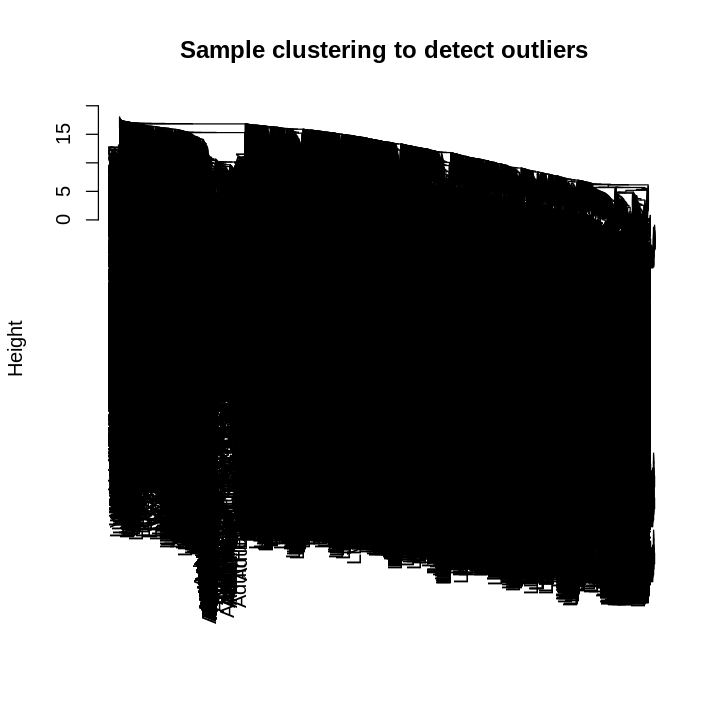

In [43]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [44]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 12 genes from module 1 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
     mergeCloseModules: less than two proper modules.
      ..color levels are grey, turquoise
      ..there is nothing to merge.
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


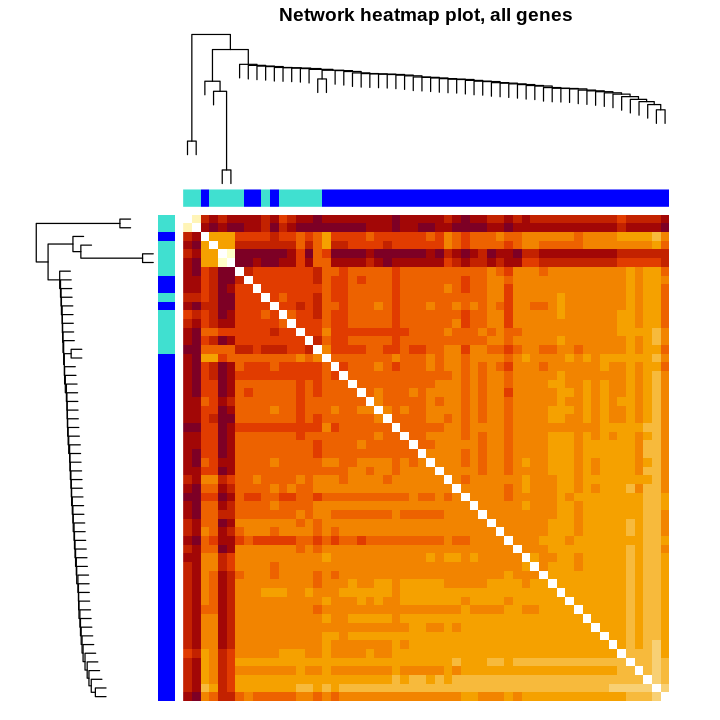

In [45]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

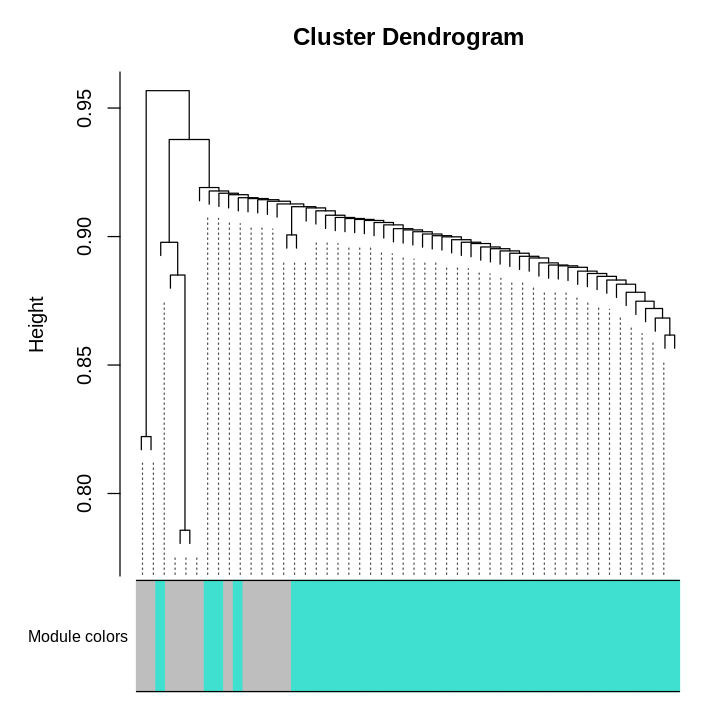

In [46]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [47]:
table(net$colors)


     grey turquoise 
       12        44 

In [49]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [50]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [51]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.csv'))

# Myelo

In [52]:
ct = "Myelocyte"

In [53]:
cm.sample <- subset(dataobj,cell_type==ct,downsample=10000,seed=1234)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [54]:
df <- df[apply(df,1,mad)>0,]

In [55]:
dim(df)

[1]   58 8389

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

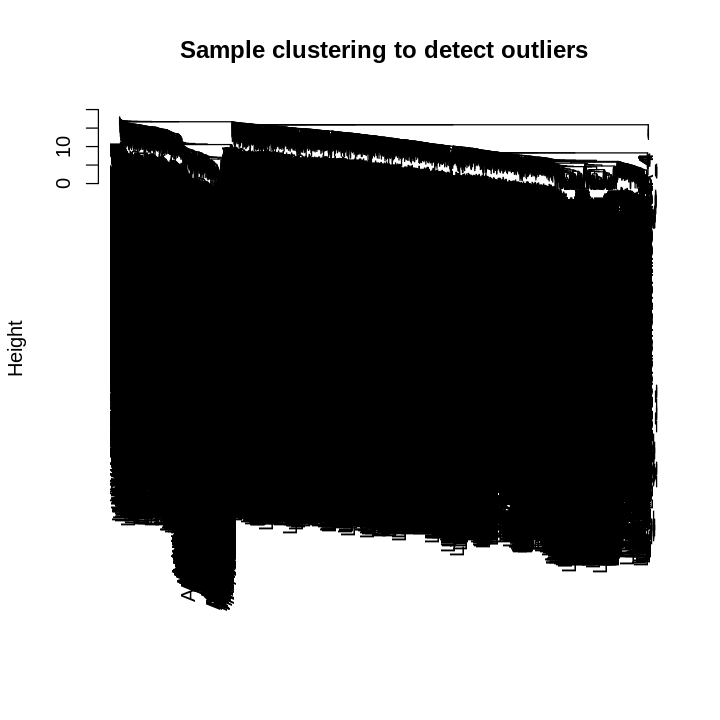

In [56]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [57]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 9 genes from module 1 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
     mergeCloseModules: less than two proper modules.
      ..color levels are grey, turquoise
      ..there is nothing to merge.
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


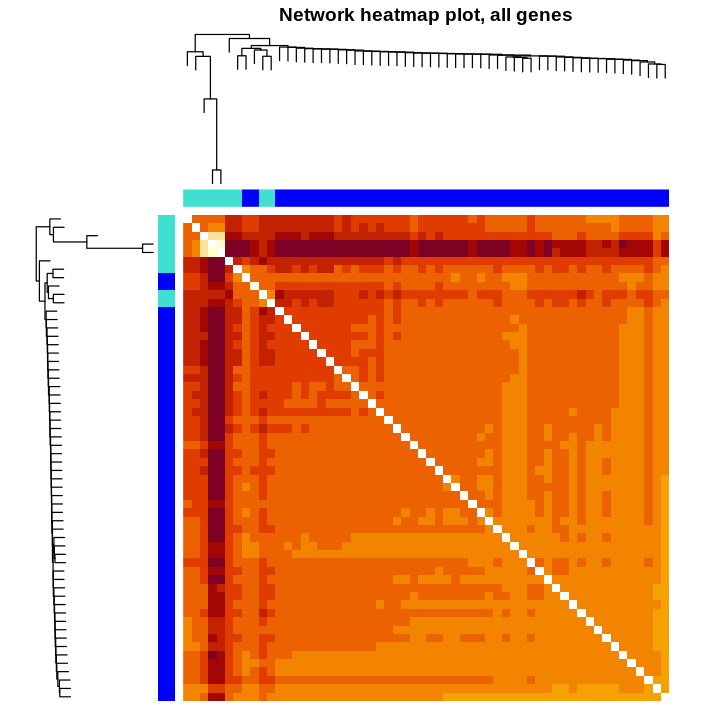

In [58]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

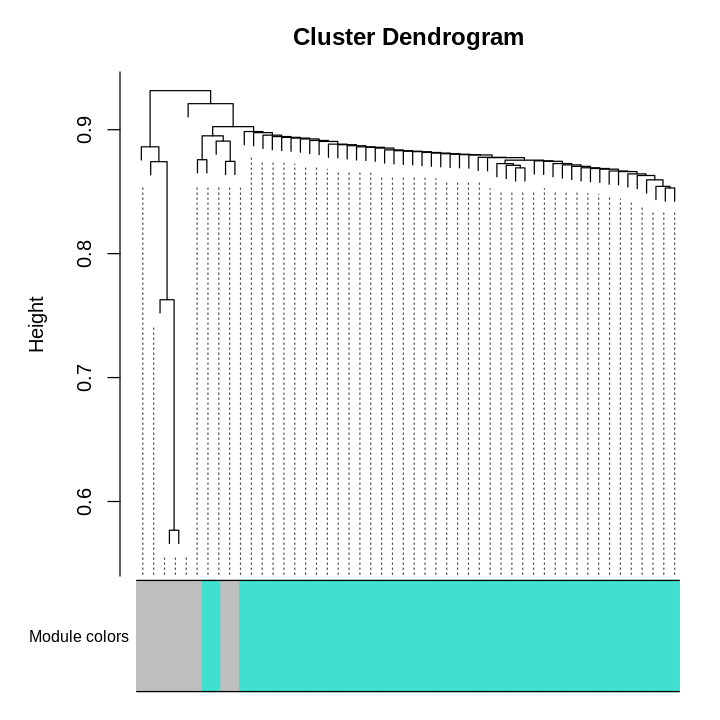

In [59]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [60]:
table(net$colors)


     grey turquoise 
        9        49 

In [61]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [62]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [63]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.csv'))

# Peri

In [64]:
ct = "Pericyte"

In [65]:
cm.sample <- subset(dataobj,cell_type==ct,downsample=10000,seed=1234)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [66]:
df <- df[apply(df,1,mad)>0,]

In [67]:
dim(df)

[1]    73 10805

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

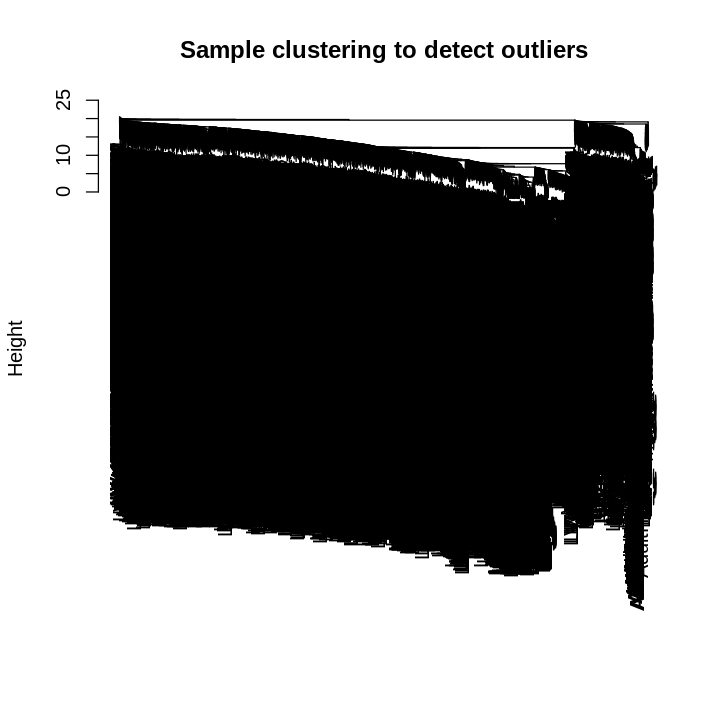

In [68]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [69]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 22 genes from module 1 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
     mergeCloseModules: less than two proper modules.
      ..color levels are grey, turquoise
      ..there is nothing to merge.
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


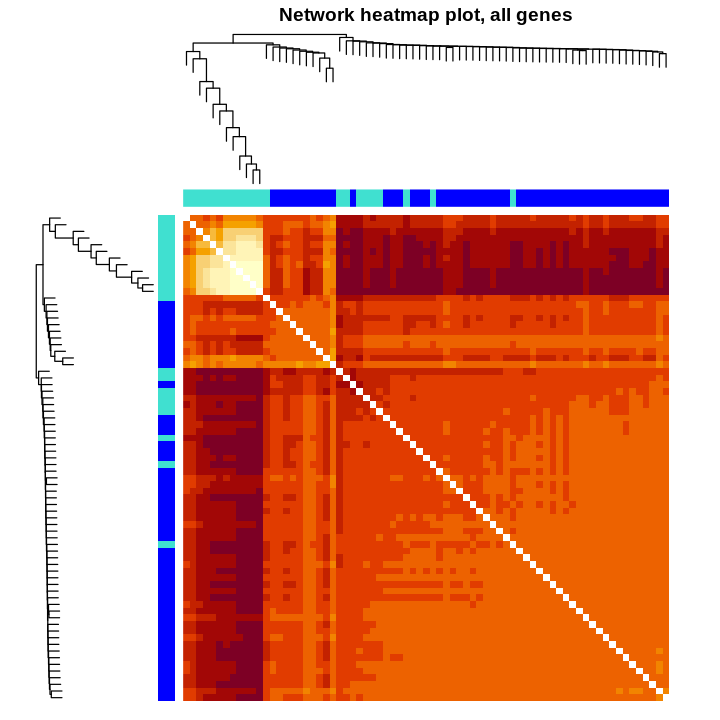

In [70]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

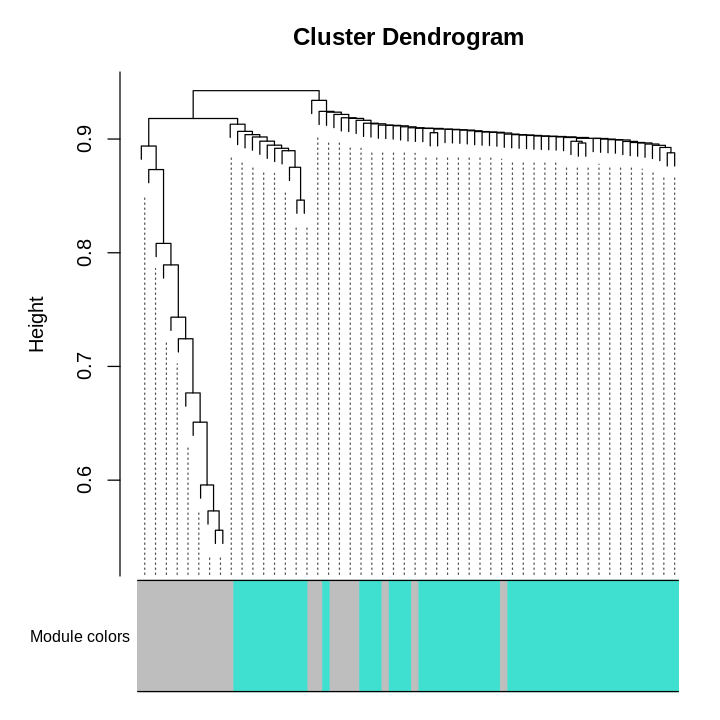

In [71]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [72]:
table(net$colors)


     grey turquoise 
       22        51 

In [73]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [74]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [75]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.csv'))

# SMC

In [76]:
ct = "Smooth muscle cell"

In [77]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [78]:
df <- df[apply(df,1,mad)>0,]

In [79]:
dim(df)

[1]   51 2275

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

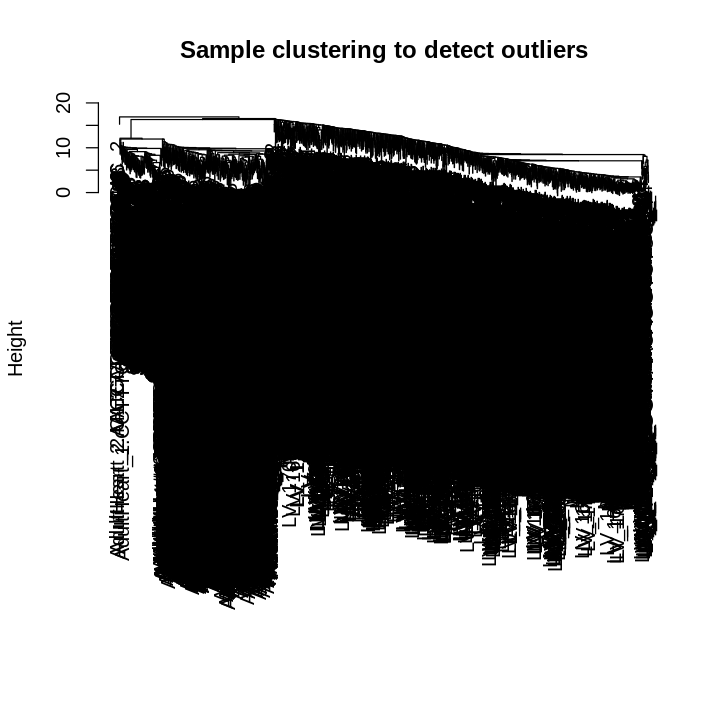

In [80]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [81]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 15 genes from module 1 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
     mergeCloseModules: less than two proper modules.
      ..color levels are grey, turquoise
      ..there is nothing to merge.
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


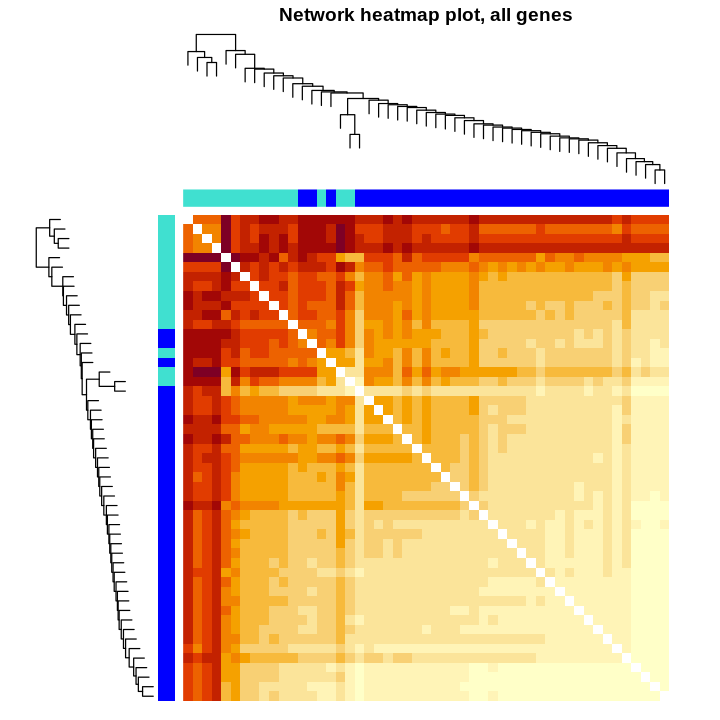

In [82]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

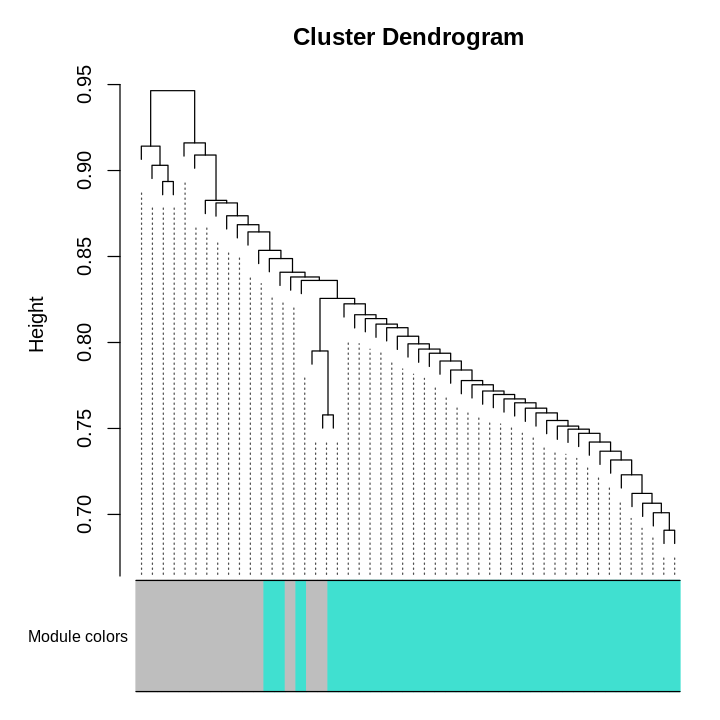

In [83]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [84]:
table(net$colors)


     grey turquoise 
       15        36 

In [85]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [86]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [87]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.csv'))

# Neuron

In [88]:
ct = "Neuron"

In [89]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [90]:
df <- df[apply(df,1,mad)>0,]

In [91]:
dim(df)

[1]   49 1100

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

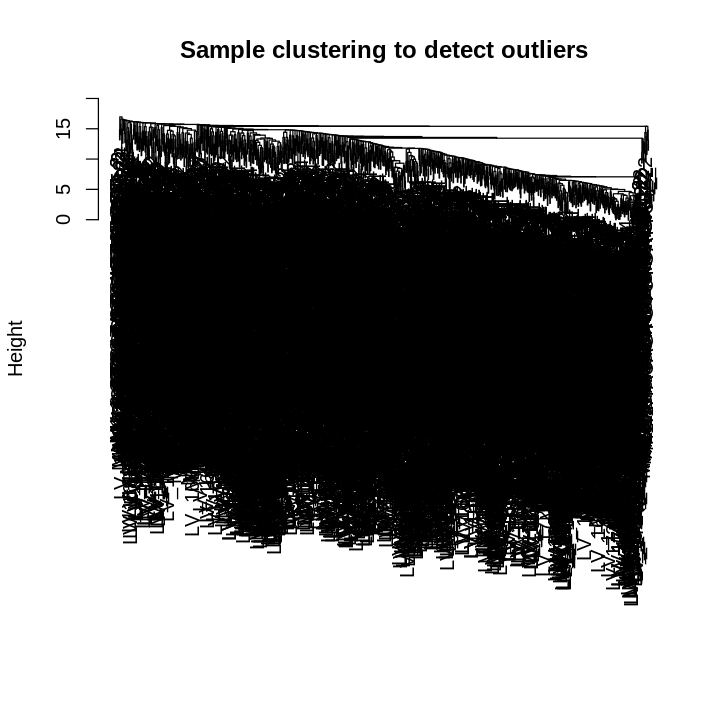

In [92]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [93]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
 No significant modules detected in block 1
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15


Warning message in blockwiseModules(datExpr_filted, power = 5, corType = "bicor", :
“blockwiseModules: mergeCloseModules failed with the following error message:
     Error in mergeCloseModules(datExpr, colors[gsg$goodGenes], cutHeight = mergeCutHeight,  : 
  Error in moduleEigengenes(expr = exprData[[set]]$data, colors = setColors,  : 
  Color levels are empty. Possible reason: the only color is grey and grey module is excluded from the calculation.

 
--> returning unmerged colors.
”


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


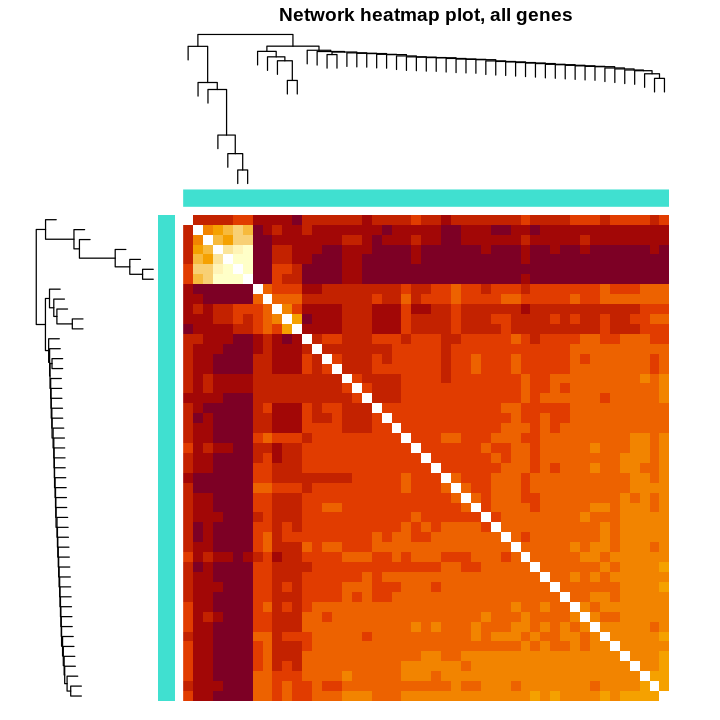

In [94]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

Warning message in pmin(objHeights[dendro$order][floor(positions)], objHeights[dendro$order][ceiling(positions)]):
“an argument will be fractionally recycled”


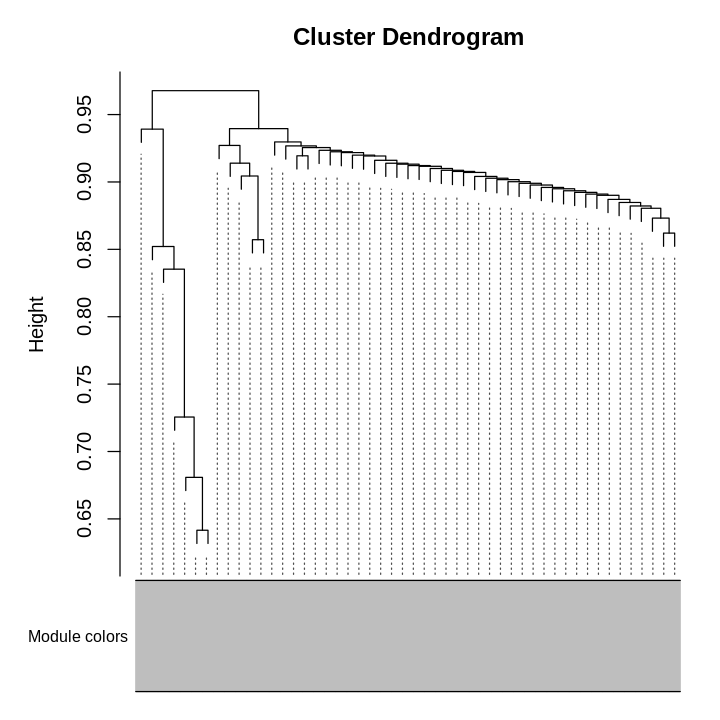

In [95]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [96]:
table(net$colors)


grey 
  49 

In [97]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [98]:
googene <- colnames(datExpr_filted)[net$colors == "grey"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [99]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.csv'))

# Lympho

In [100]:
ct = "Lymphocyte"

In [101]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [102]:
df <- df[apply(df,1,mad)>0,]

In [103]:
dim(df)

[1]   13 1192

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

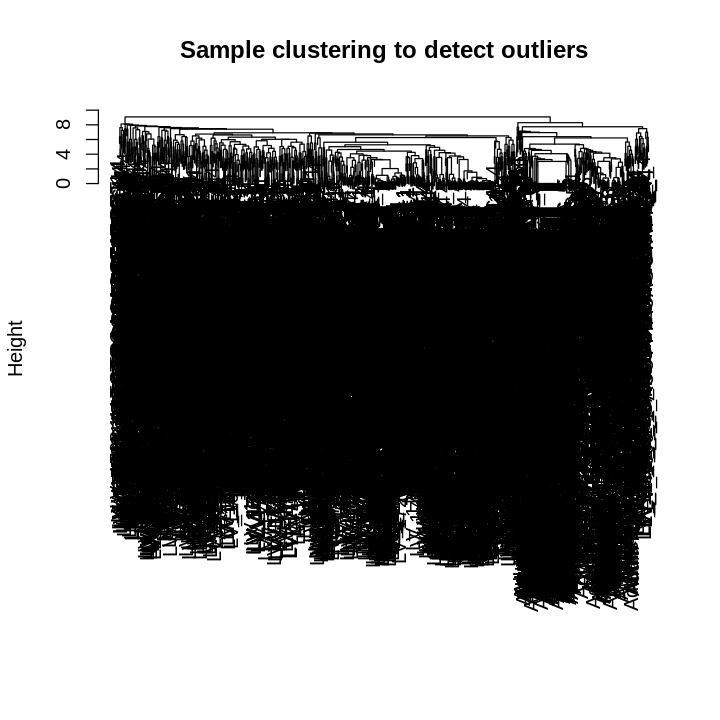

In [104]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [105]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 2 genes from module 1 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
     mergeCloseModules: less than two proper modules.
      ..color levels are grey, turquoise
      ..there is nothing to merge.
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


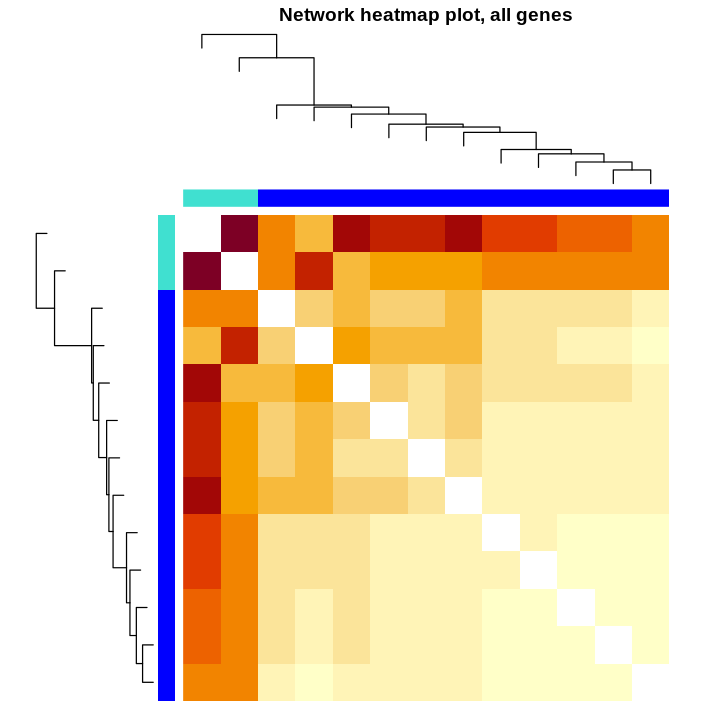

In [106]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

Warning message in pmin(objHeights[dendro$order][floor(positions)], objHeights[dendro$order][ceiling(positions)]):
“an argument will be fractionally recycled”


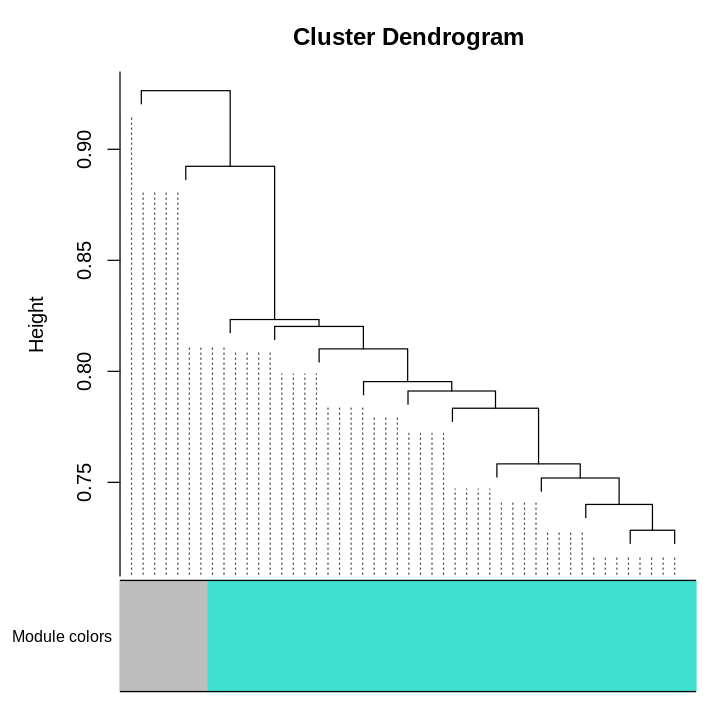

In [107]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [108]:
table(net$colors)


     grey turquoise 
        2        11 

In [109]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [110]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [111]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.csv'))

# Adipocyte

In [112]:
ct = "Adipocyte"

In [113]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [114]:
df <- df[apply(df,1,mad)>0,]

In [115]:
dim(df)

[1] 799 761

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

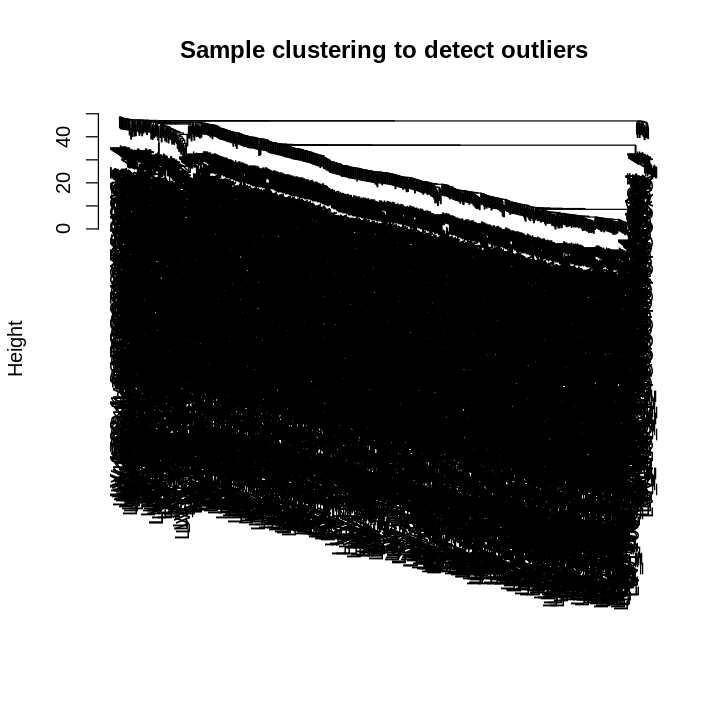

In [116]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [117]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 30 genes from module 1 because their KME is too low.
     ..removing 3 genes from module 2 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


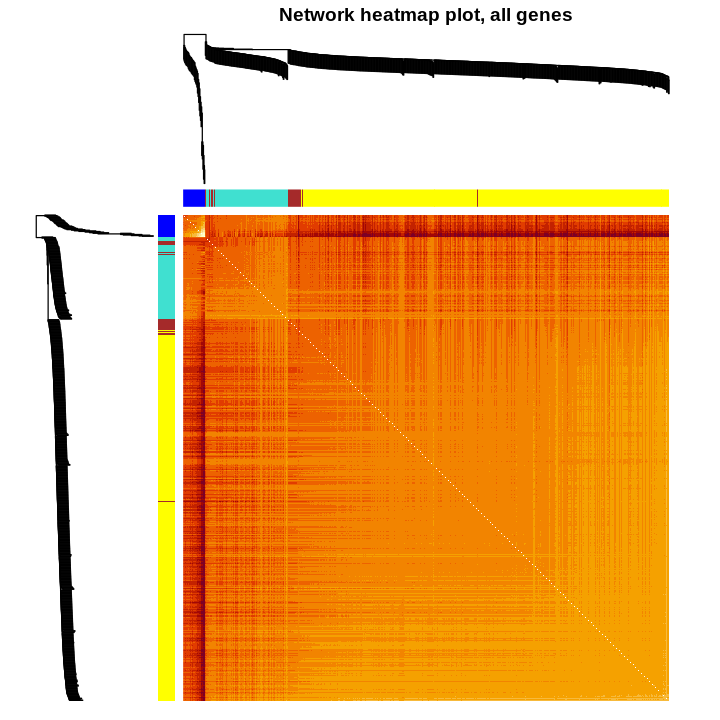

In [118]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

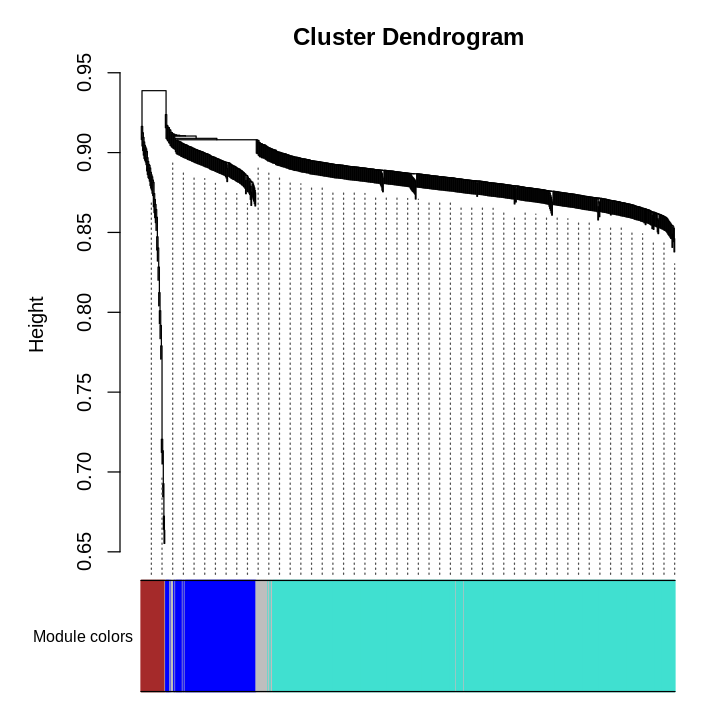

In [119]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [120]:
table(net$colors)


     blue     brown      grey turquoise 
      127        36        33       603 

In [121]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [122]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [123]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.1.csv'))

In [124]:
googene <- colnames(datExpr_filted)[net$colors == "blue"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [125]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.2.csv'))

In [126]:
googene <- colnames(datExpr_filted)[net$colors == "brown"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [127]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LV/',ct,'.3.csv'))